In [54]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\Sam\Desktop\DA - DS\Portfolio\Data Sets\movie data sets\movies.csv')



df.head() # or  use df to view the full table


C:\Users\Sam\AppData\Local\Temp\ipykernel_2304\2508475228.py:21: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Sam\Desktop\DA - DS\Portfolio\Data Sets\movie data sets\movies.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [2]:
# Data Cleaning
# Let's see if there are any missing data
# Find the percentage of missing data for each column

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

adult - 0%
belongs_to_collection - 90%
budget - 0%
genres - 0%
homepage - 83%
id - 0%
imdb_id - 0%
original_language - 0%
original_title - 0%
overview - 2%
popularity - 0%
poster_path - 1%
production_companies - 0%
production_countries - 0%
release_date - 0%
revenue - 0%
runtime - 1%
spoken_languages - 0%
status - 0%
tagline - 55%
title - 0%
video - 0%
vote_average - 0%
vote_count - 0%


In [3]:
# data type of each column.
df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [4]:
df['revenue']

0        373554033.0
1        262797249.0
2                0.0
3         81452156.0
4         76578911.0
            ...     
45461            0.0
45462            0.0
45463            0.0
45464            0.0
45465            0.0
Name: revenue, Length: 45466, dtype: float64

In [5]:
# As you see above , the revenue column has a .0 format
# We want to remove the .0 at the end of cells in this column

df['revenue'] = df['revenue'].fillna(pd.NA).astype(pd.Int64Dtype())

In [6]:
df['revenue']

0        373554033
1        262797249
2                0
3         81452156
4         76578911
           ...    
45461            0
45462            0
45463            0
45464            0
45465            0
Name: revenue, Length: 45466, dtype: Int64

In [161]:
# now we want to create a new column year with 4 digits only (not a full date format)
df['year'] = df['release_date'].astype(str).str[:4]


In [162]:
# order data by revenue
df.sort_values (by=['revenue'], inplace=False, ascending=False).head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Num_Budget,year
14551,0,1557,472,2262,2162,12744,28145,17,3051,23486,...,162.0,665,4,4524,3398,0,7.2,12114.0,237000000,1474
26555,0,0,486,2415,6130,6447,39514,17,29187,38391,...,136.0,1132,4,4676,28846,0,7.5,7993.0,245000000,1680
1639,0,-1,380,1510,6744,36963,18240,17,36578,604,...,194.0,737,4,10769,38665,0,7.5,7770.0,200000000,1116


In [163]:
# Remove Duplicates from a specific column
df['title'].drop_duplicates().sort_values(ascending=False).head(6)

41473    42276
39033    42275
8882     42274
38463    42273
22346    42272
44022    42271
Name: title, dtype: int32

In [164]:
df.drop_duplicates().head()  # remove duplicates from the entire table

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Num_Budget,year
0,0,14,599,1407,1641,42811,17050,17,36901,26666,...,81.0,1132,4,-1,39018,0,7.7,5415.0,30000000,1067
1,0,-1,973,692,-1,43246,16810,17,16240,42915,...,104.0,843,4,11958,16806,0,6.9,2413.0,65000000,1070
2,0,147,0,218,-1,8245,16752,17,12790,3150,...,101.0,1132,4,13393,13371,0,6.5,92.0,0,1071
3,0,-1,265,2980,-1,22680,17080,17,38526,15856,...,127.0,1132,4,5632,40428,0,6.1,34.0,16000000,1071
4,0,1659,0,3202,-1,3366,16701,17,10834,26063,...,106.0,1132,4,8980,11199,0,5.7,173.0,0,1050


In [165]:
# Numeric Budget - Convert from object to int32
nbg = df['budget'].astype(int)  

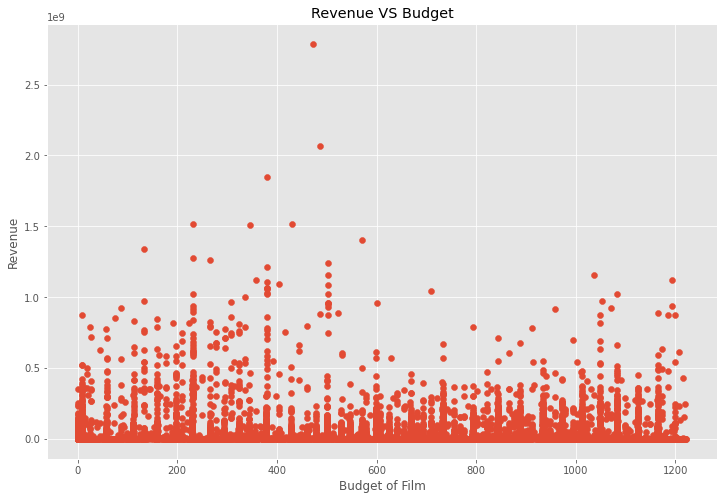

In [166]:
# Finding Correlations
# Scatter plot with budget vs growth
# make sure matplotlib is already run


plt.scatter(x=nbg, y=df['revenue'])


plt.title('Revenue VS Budget')
plt.xlabel ( 'Budget of Film')
plt.ylabel ( 'Revenue')
plt.show ()





<AxesSubplot:xlabel='budget', ylabel='revenue'>

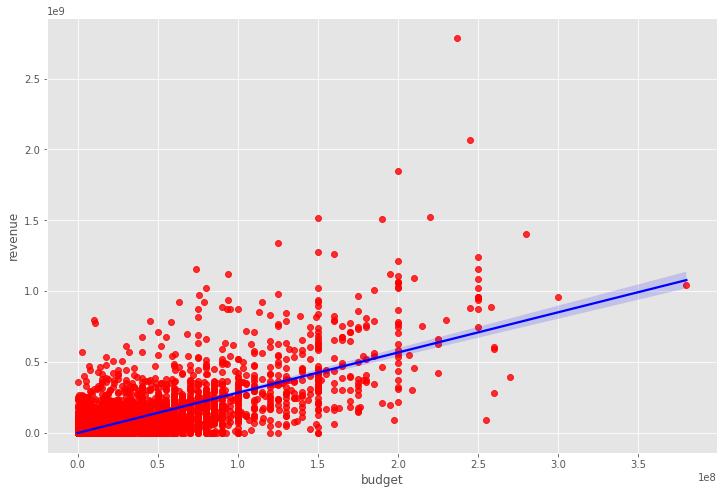

In [167]:
sns.regplot(x=zdf,y='revenue',data=df ,  scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [168]:
df['Num_Budget'] =nbg  # Adding a new column called numeric budget


In [169]:
df.head()


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Num_Budget,year
0,0,14,599,1407,1641,42811,17050,17,36901,26666,...,81.0,1132,4,-1,39018,0,7.7,5415.0,599,1067
1,0,-1,973,692,-1,43246,16810,17,16240,42915,...,104.0,843,4,11958,16806,0,6.9,2413.0,973,1070
2,0,147,0,218,-1,8245,16752,17,12790,3150,...,101.0,1132,4,13393,13371,0,6.5,92.0,0,1071
3,0,-1,265,2980,-1,22680,17080,17,38526,15856,...,127.0,1132,4,5632,40428,0,6.1,34.0,265,1071
4,0,1659,0,3202,-1,3366,16701,17,10834,26063,...,106.0,1132,4,8980,11199,0,5.7,173.0,0,1050


In [177]:
# Finding correlations
df.corr(method = 'pearson')  # 3 methods exist: pearson, Kendall, Spearman

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Num_Budget,year
adult,1.000000,-0.003940,0.000212,0.012350,0.000920,0.005582,0.005180,-0.004444,-0.004864,0.000179,...,-0.009029,0.000598,-0.019053,0.005995,-0.006002,-0.000637,-0.012403,-0.002922,0.000212,-0.002335
belongs_to_collection,-0.003940,1.000000,0.102125,-0.005895,0.046767,-0.006669,-0.017359,0.003289,0.004432,0.050305,...,0.005046,0.035570,0.003049,0.079375,-0.012107,-0.009192,0.039106,0.179573,0.102125,0.023673
budget,0.000212,0.102125,1.000000,0.016022,0.138664,-0.016238,0.068899,-0.059169,-0.014884,0.014030,...,0.120882,0.021693,0.011519,0.210030,-0.008404,-0.014813,0.085483,0.289182,1.000000,-0.068973
genres,0.012350,-0.005895,0.016022,1.000000,0.053601,0.021746,0.067321,-0.057486,-0.028418,0.000821,...,0.015067,0.054691,0.010926,0.070321,-0.013786,-0.033804,0.060394,-0.013201,0.016022,-0.032900
homepage,0.000920,0.046767,0.138664,0.053601,1.000000,0.015013,0.300014,-0.049857,0.042405,0.031238,...,0.037878,0.000181,-0.007489,0.074458,0.044409,0.014687,0.061241,0.179507,0.138664,-0.191060
id,0.005582,-0.006669,-0.016238,0.021746,0.015013,1.000000,-0.034898,0.035391,0.021985,-0.009683,...,0.000085,0.020620,-0.007771,0.003209,0.021186,-0.003012,0.028126,0.000605,-0.016238,0.020041
imdb_id,0.005180,-0.017359,0.068899,0.067321,0.300014,-0.034898,1.000000,0.080955,-0.022490,0.012161,...,-0.029496,0.000416,-0.036514,-0.086341,-0.067006,0.027431,0.012260,0.071651,0.068899,-0.519401
original_language,-0.004444,0.003289,-0.059169,-0.057486,-0.049857,0.035391,0.080955,1.000000,0.165769,-0.006131,...,0.046216,0.403162,0.004522,-0.178581,0.007810,-0.010154,0.072990,-0.066738,-0.059169,0.005986
original_title,-0.004864,0.004432,-0.014884,-0.028418,0.042405,0.021985,-0.022490,0.165769,1.000000,0.044871,...,0.045372,0.085959,0.002065,-0.026283,0.727137,0.012971,0.044654,-0.005527,-0.014884,0.019620
overview,0.000179,0.050305,0.014030,0.000821,0.031238,-0.009683,0.012161,-0.006131,0.044871,1.000000,...,0.047842,0.010968,0.018639,0.019020,0.037242,0.004477,0.027306,0.024413,0.014030,-0.020342


In [171]:
#  ↑↑↑↑↑↑↑↑↑↑↑↑↑  there is a high correlation 0.81 between revenue and vote count

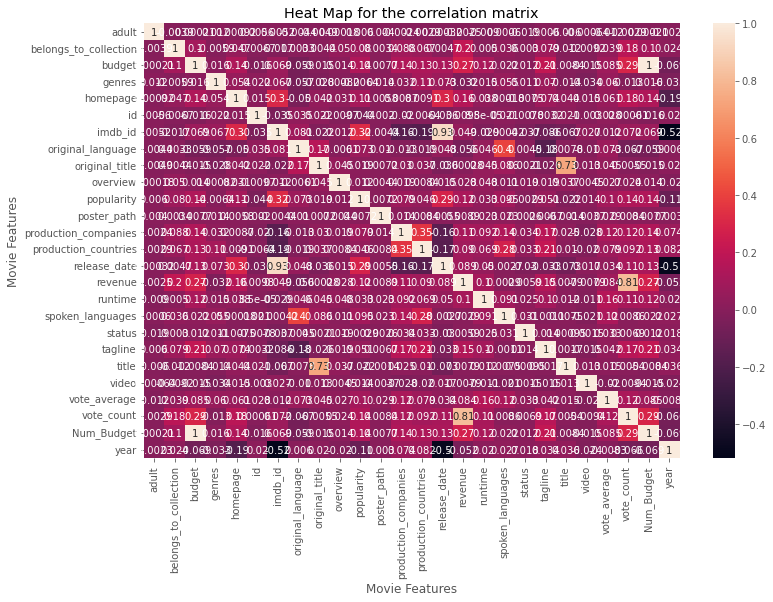

In [178]:
# Create a heat map for the correlation matrix
# Bright colors show high correlation
correlation_matrix= df.corr(method = 'pearson')
sns.heatmap(correlation_matrix , annot = True)


plt.title('Heat Map for the correlation matrix')
plt.xlabel ( 'Movie Features')
plt.ylabel ( 'Movie Features')
plt.show ()

In [173]:
# Turn all columns to numbers (integers and floats)

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
       df_numerized [ col_name] = df_numerized[col_name].astype('category')
       df_numerized [col_name] = df_numerized[col_name].cat.codes
df_numerized

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Num_Budget,year
0,0,14,599,1407,1641,42811,17050,17,36901,26666,...,81.0,1132,4,-1,39018,0,7.7,5415.0,599,78
1,0,-1,973,692,-1,43246,16810,17,16240,42915,...,104.0,843,4,11958,16806,0,6.9,2413.0,973,82
2,0,147,0,218,-1,8245,16752,17,12790,3150,...,101.0,1132,4,13393,13371,0,6.5,92.0,0,83
3,0,-1,265,2980,-1,22680,17080,17,38526,15856,...,127.0,1132,4,5632,40428,0,6.1,34.0,265,83
4,0,1659,0,3202,-1,3366,16701,17,10834,26063,...,106.0,1132,4,8980,11199,0,5.7,173.0,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,-1,0,1542,4042,31757,45270,22,41017,31402,...,90.0,1199,4,11922,29278,0,4.0,1.0,0,0
45462,0,-1,0,2004,-1,2099,37203,79,28084,12105,...,360.0,1867,4,-1,6516,0,9.0,3.0,0,601
45463,0,-1,0,2563,-1,38798,23289,17,3994,42864,...,90.0,1132,4,1052,4377,0,3.8,6.0,0,305
45464,0,-1,0,0,-1,15173,169,17,27128,23083,...,87.0,0,4,-1,26679,0,0.0,0.0,0,1570


In [174]:
df_numerized.dtypes

adult                       int8
belongs_to_collection      int16
budget                     int16
genres                     int16
homepage                   int16
id                         int32
imdb_id                    int32
original_language           int8
original_title             int32
overview                   int32
popularity                 int32
poster_path                int32
production_companies       int16
production_countries       int16
release_date               int16
revenue                  float64
runtime                  float64
spoken_languages           int16
status                      int8
tagline                    int16
title                      int32
video                       int8
vote_average             float64
vote_count               float64
Num_Budget                 int32
year                       int16
dtype: object

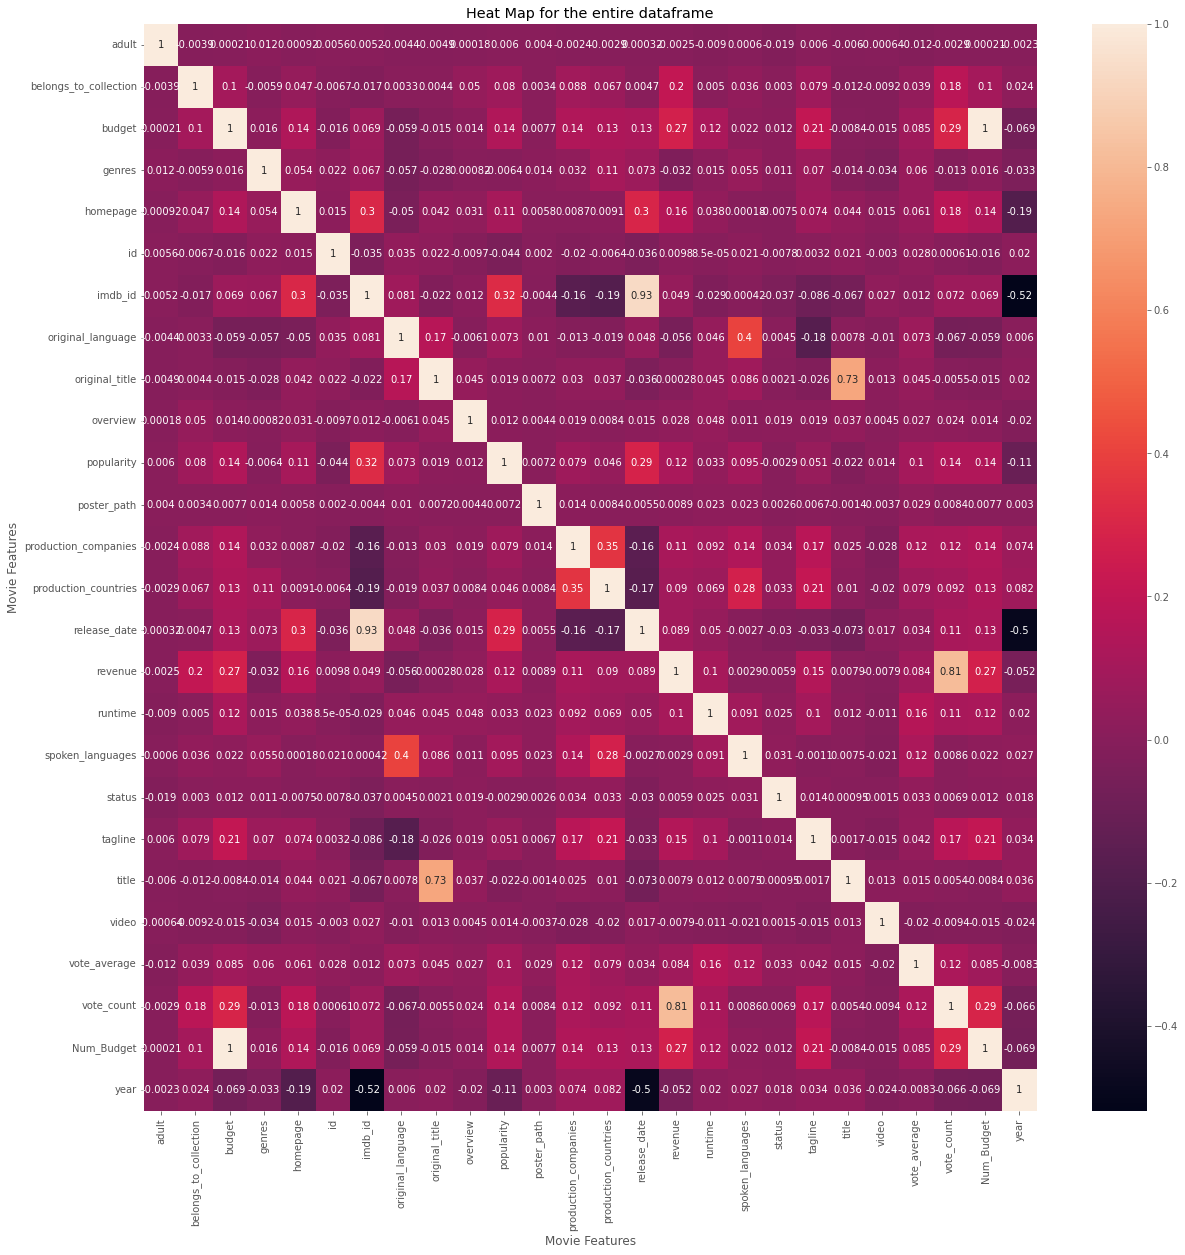

In [175]:
correlation_matrix= df_numerized.corr(method = 'pearson')
plt.figure(figsize=(20,20))  # Resize so all the cell values are readable
sns.heatmap(correlation_matrix , annot = True)


plt.title('Heat Map for the entire dataframe')
plt.xlabel ( 'Movie Features')
plt.ylabel ( 'Movie Features')
plt.show ()

In [179]:
# Find the highest correlated pairs , ignore identical pairs
high_corr1 = sorted_pairs[  (sorted_pairs) >0.3  ]
high_corr2 =  high_corr1 [high_corr1 < 1]
high_corr2

imdb_id               release_date            0.931049
release_date          imdb_id                 0.931049
revenue               vote_count              0.812022
vote_count            revenue                 0.812022
revenue               Num_Budget              0.768776
Num_Budget            revenue                 0.768776
original_title        title                   0.727137
title                 original_title          0.727137
vote_count            Num_Budget              0.676642
Num_Budget            vote_count              0.676642
                      budget                  0.419004
budget                Num_Budget              0.419004
original_language     spoken_languages        0.403162
spoken_languages      original_language       0.403162
production_companies  production_countries    0.353850
production_countries  production_companies    0.353850
imdb_id               popularity              0.318551
popularity            imdb_id                 0.318551
imdb_id   

In [ ]:
#The highest correlations exist between the following pairs:
#imdb_id               release_date            0.93
#revenue               vote_count              0.81
#revenue               Num_Budget              0.77